In [4]:
import pandas as pd

disease_data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'name': ["John Doe", "Jane Smith", "Michael Brown", "Sara White", "David Lee", "Emily Clark", "Chris Turner", "Nancy Wright", "Andrew Hill", "Jessica Green"],
    'age': [34, 28, 45, 50, 36, 29, 41, 33, 47, 39],
    'gender': ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    'disease': ["Diabetes", "Hypertension", "Asthma", "COPD", "Arthritis", "Heart Disease", "Stroke", "Cancer", "Obesity", "Kidney Disease"],
    'severity': ["Moderate", "Mild", "Severe", "Moderate", "Mild", "Severe", "Moderate", "Mild", "Severe", "Moderate"],
    'treatment_plan': ["Insulin", "Lifestyle Change", "Inhaler", "Medication", "Physical Therapy", "Surgery", "Rehabilitation", "Chemotherapy", "Diet Plan", "Dialysis"],
    'doctor_assigned': ["Dr. Patel", "Dr. Johnson", "Dr. Smith", "Dr. Gupta", "Dr. Brown", "Dr. Clark", "Dr. Lee", "Dr. Turner", "Dr. Wright", "Dr. Green"],
    'admission_date': ["2023-01-15", "2023-02-20", "2023-03-10", "2023-04-05", "2023-05-18", "2023-06-22", "2023-07-30", "2023-08-14", "2023-09-25", "2023-10-31"],
    'discharge_date': ["2023-01-25", "2023-02-28", "2023-03-20", "2023-04-12", "2023-05-25", "2023-06-30", "2023-08-05", "2023-08-24", "2023-10-05", "2023-11-10"]
}

disease_df = pd.DataFrame(disease_data)

In [1]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10, 6)) 
disease_counts = disease_df['disease'].value_counts() 
disease_counts.plot(kind='bar', color='skyblue') 

plt.title('Disease Count') 
plt.xlabel('Disease') 
plt.ylabel('Count') 
plt.xticks(rotation=45) 
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [6]:
# Mapping severity to numeric values for scatter plot 
severity_mapping = {"Mild": 1, "Moderate": 2, "Severe": 3} 
disease_df['severity_numeric'] = disease_df['severity'].map(severity_mapping)

HANDLING THE 0 , NaN and EMPTY

In [17]:
import pandas as pd
import numpy as np

# Example DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Salary': [50000, 0, np.nan, 30000]}
df = pd.DataFrame(data)

df

,Name,Salary
0,Alice,50000.0
1,Bob,0.0
2,Charlie,NaN
3,David,30000.0


In [18]:
# Identify problematic rows
print(df[df['Salary'].isnull()])  # Check for NaN
print(df[df['Salary'] == 0])      # Check for zeros

      Name  Salary
2  Charlie     NaN
  Name  Salary
1  Bob     0.0


In [19]:
# Replace NaN and 0 with "TBD"
df['Salary'] = df['Salary'].replace(0, np.nan)  # Treat 0 as NaN
df['Salary'] = df['Salary'].fillna("TBD")      # Replace NaN with "TBD"

In [20]:
df

,Name,Salary
0,Alice,50000.0
1,Bob,TBD
2,Charlie,TBD
3,David,30000.0


In [22]:
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')  # Convert non-numeric to NaN
current_avg_salary = df['Salary'].mean()  # Calculate mean of numeric values
print(current_avg_salary)

40000.0


In [23]:
num_tbd = df['Salary'].isnull().sum()

In [ ]:
print(num_tbd)

2


In [25]:
unique_salaries = np.random.choice(range(30000, 60000), size=num_tbd, replace=False)

In [26]:
df.loc[df['Salary'].isnull(), 'Salary'] = unique_salaries

In [27]:
df

,Name,Salary
0,Alice,50000.0
1,Bob,50434.0
2,Charlie,56183.0
3,David,30000.0


In [28]:
post_avg_salary = df['Salary'].mean()
print(post_avg_salary)

46654.25


In [ ]:
import pandas as pd
import numpy as np

# Employee Dataset

Employees = {
    "reg_id": [100 , 101, 102, 103, 104, 105, 106, 107, 108, 109],
    "name" : [ "Sankalpa", "Shristi", "Virat", "Rohit", "Samark", "Shreyas", "Guras", "Paras","Pramesh", "Mohit"],
    "salary" :[22000, 20000, 2000, 5000, 5000, 5000, 5000, 15000, 5000, 5000],
    "position" :["HOD", "Sub HOD", "Manager", "Manager", "Manager", "Receptionist" ,"Accountant", "salesman", "salesman", "salesman"],
}

employee_df = pd.DataFrame(Employees)
employee_df.head()

,reg_id,name,salary,position
0,100,Sankalpa,22000,HOD
1,101,Shristi,20000,Sub HOD
2,102,Virat,2000,Manager
3,103,Rohit,5000,Manager
4,104,Samark,5000,Manager


In [7]:
annual_salary = employee_df['salary']*12
print(annual_salary)

0    264000
1    240000
2     24000
3     60000
4     60000
5     60000
6     60000
7    180000
8     60000
9     60000
Name: salary, dtype: int64


In [13]:
df_after_annual_salary = employee_df.copy()
df_after_annual_salary['annual_salary'] = annual_salary
df_after_annual_salary.head()

,reg_id,name,salary,position,annual_salary
0,100,Sankalpa,22000,HOD,264000
1,101,Shristi,20000,Sub HOD,240000
2,102,Virat,2000,Manager,24000
3,103,Rohit,5000,Manager,60000
4,104,Samark,5000,Manager,60000


In [14]:
manager_list = df_after_annual_salary[df_after_annual_salary['position'] == 'Manager']
manager_list

,reg_id,name,salary,position,annual_salary
2,102,Virat,2000,Manager,24000
3,103,Rohit,5000,Manager,60000
4,104,Samark,5000,Manager,60000


In [15]:
tax = (13/100)*df_after_annual_salary['salary']
tax

0    2860.0
1    2600.0
2     260.0
3     650.0
4     650.0
5     650.0
6     650.0
7    1950.0
8     650.0
9     650.0
Name: salary, dtype: float64

In [16]:
df_after_tax = df_after_annual_salary.copy()
df_after_tax['tax amount'] = tax
df_after_tax.head()

,reg_id,name,salary,position,annual_salary,tax amount
0,100,Sankalpa,22000,HOD,264000,2860.0
1,101,Shristi,20000,Sub HOD,240000,2600.0
2,102,Virat,2000,Manager,24000,260.0
3,103,Rohit,5000,Manager,60000,650.0
4,104,Samark,5000,Manager,60000,650.0


In [17]:
real_salary= annual_salary - tax

real_salary_df =df_after_tax.copy()
real_salary_df['salary amount'] = real_salary
real_salary_df

,reg_id,name,salary,position,annual_salary,tax amount,salary amount
0,100,Sankalpa,22000,HOD,264000,2860.0,261140.0
1,101,Shristi,20000,Sub HOD,240000,2600.0,237400.0
2,102,Virat,2000,Manager,24000,260.0,23740.0
3,103,Rohit,5000,Manager,60000,650.0,59350.0
4,104,Samark,5000,Manager,60000,650.0,59350.0
5,105,Shreyas,5000,Receptionist,60000,650.0,59350.0
6,106,Guras,5000,Accountant,60000,650.0,59350.0
7,107,Paras,15000,salesman,180000,1950.0,178050.0
8,108,Pramesh,5000,salesman,60000,650.0,59350.0
9,109,Mohit,5000,salesman,60000,650.0,59350.0


In [18]:
incresed_salary = real_salary + 5000 + ((10/100)*annual_salary) 
print(incresed_salary)

0    292540.0
1    266400.0
2     31140.0
3     70350.0
4     70350.0
5     70350.0
6     70350.0
7    201050.0
8     70350.0
9     70350.0
Name: salary, dtype: float64


In [19]:
salary_after_inccrement_df = real_salary_df.copy()
salary_after_inccrement_df['latest_salary'] = incresed_salary
salary_after_inccrement_df

,reg_id,name,salary,position,annual_salary,tax amount,salary amount,latest_salary
0,100,Sankalpa,22000,HOD,264000,2860.0,261140.0,292540.0
1,101,Shristi,20000,Sub HOD,240000,2600.0,237400.0,266400.0
2,102,Virat,2000,Manager,24000,260.0,23740.0,31140.0
3,103,Rohit,5000,Manager,60000,650.0,59350.0,70350.0
4,104,Samark,5000,Manager,60000,650.0,59350.0,70350.0
5,105,Shreyas,5000,Receptionist,60000,650.0,59350.0,70350.0
6,106,Guras,5000,Accountant,60000,650.0,59350.0,70350.0
7,107,Paras,15000,salesman,180000,1950.0,178050.0,201050.0
8,108,Pramesh,5000,salesman,60000,650.0,59350.0,70350.0
9,109,Mohit,5000,salesman,60000,650.0,59350.0,70350.0


In [20]:
data_array = salary_after_inccrement_df.to_numpy()
print(data_array)

[[100 'Sankalpa' 22000 'HOD' 264000 2860.0 261140.0 292540.0]
 [101 'Shristi' 20000 'Sub HOD' 240000 2600.0 237400.0 266400.0]
 [102 'Virat' 2000 'Manager' 24000 260.0 23740.0 31140.0]
 [103 'Rohit' 5000 'Manager' 60000 650.0 59350.0 70350.0]
 [104 'Samark' 5000 'Manager' 60000 650.0 59350.0 70350.0]
 [105 'Shreyas' 5000 'Receptionist' 60000 650.0 59350.0 70350.0]
 [106 'Guras' 5000 'Accountant' 60000 650.0 59350.0 70350.0]
 [107 'Paras' 15000 'salesman' 180000 1950.0 178050.0 201050.0]
 [108 'Pramesh' 5000 'salesman' 60000 650.0 59350.0 70350.0]
 [109 'Mohit' 5000 'salesman' 60000 650.0 59350.0 70350.0]]


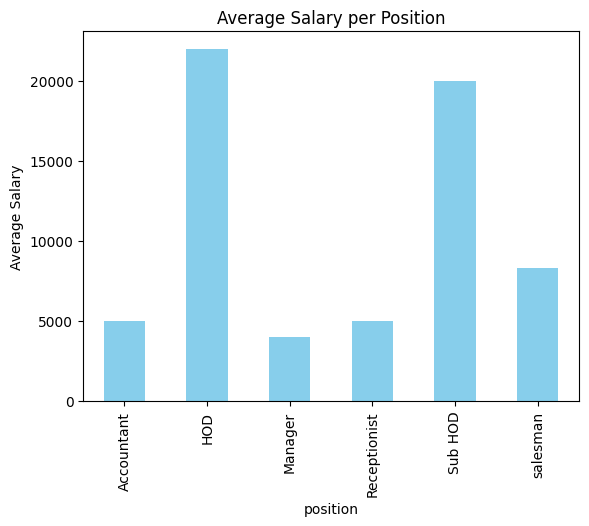

In [23]:
import matplotlib.pyplot as plt

avg_salary = employee_df.groupby('position')['salary'].mean()
avg_salary.plot(kind='bar', color='skyblue', title='Average Salary per Position')
plt.ylabel('Average Salary')
plt.show()